# **🧠 Proyek Sains Data - Eksplorasi Dataset Stroke**

langkah-langkah eksplorasi data menggunakan Python.  
Dataset: `healthcare-dataset-stroke-data.csv`  


 **LIBRARY YANG DIGUNAKAN**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting default style
sns.set(style="whitegrid")


**LOAD DataSet Dari Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

In [7]:
# ganti path sesuai lokasi file di Google Drive
df = pd.read_csv("/content/drive/MyDrive/psd/healthcare-dataset-stroke-data.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


 **Informasi Dataset**

In [8]:
print("Jumlah baris dan kolom:", df.shape)
df.info()
df.describe()


Jumlah baris dan kolom: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### ✍️ Keterangan
- `df.shape` menunjukkan jumlah baris dan kolom dataset.  
- `df.info()` memberi tahu tipe data tiap kolom dan apakah ada nilai kosong.  
- `df.describe()` menampilkan ringkasan statistik untuk kolom numerik.  


 **DISTRIBUSI PASIEN STROKE**

/tmp/ipython-input-2967592566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="stroke", data=df, palette="Set2")


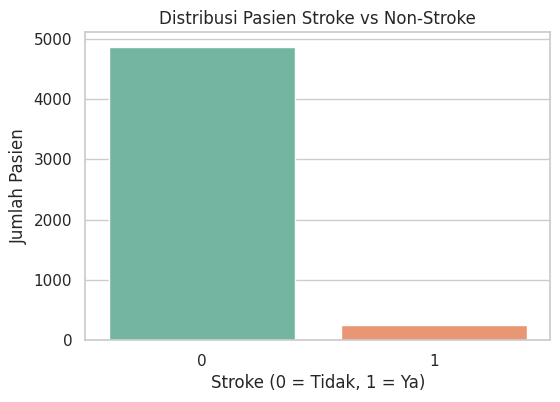

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="stroke", data=df, palette="Set2")
plt.title("Distribusi Pasien Stroke vs Non-Stroke")
plt.xlabel("Stroke (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah Pasien")
plt.show()


### ✍️ Keterangan
Grafik ini memperlihatkan jumlah pasien yang mengalami stroke (`1`) dibandingkan dengan yang tidak (`0`).  
Terlihat data tidak seimbang karena mayoritas pasien tidak mengalami stroke.  


 **DISTRIBUSI USIA**

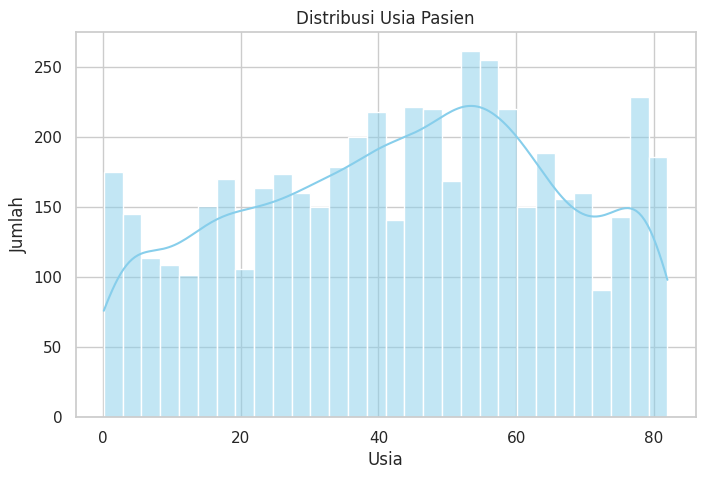

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()


### ✍️ Keterangan
Histogram menunjukkan sebaran usia pasien. Risiko stroke cenderung meningkat pada usia lanjut (>60 tahun).  


 **HEADMAP KORELASI ANTAR VARIABEL**

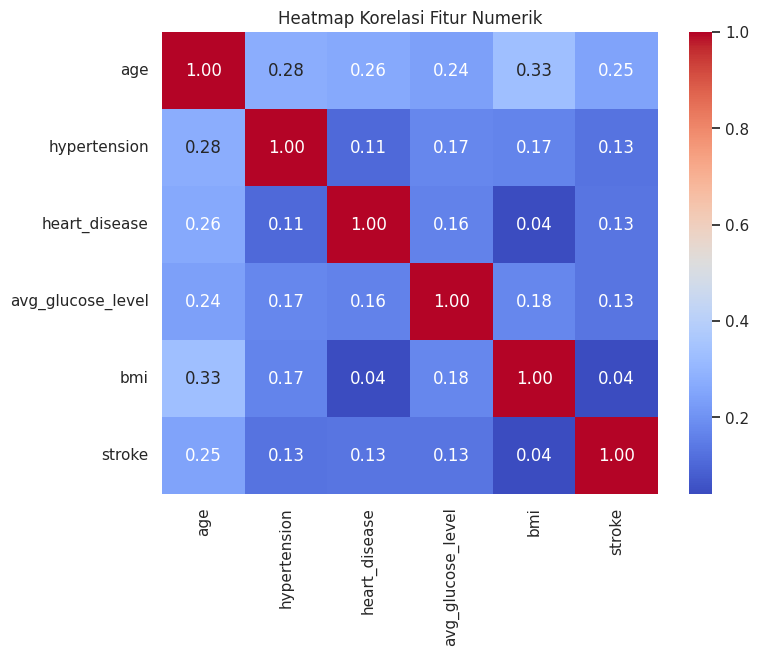

In [11]:
plt.figure(figsize=(8,6))
corr = df[["age","hypertension","heart_disease","avg_glucose_level","bmi","stroke"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


### ✍️ Keterangan
Heatmap menunjukkan hubungan antar variabel numerik.  
- Usia, hipertensi, dan kadar glukosa punya korelasi positif dengan kejadian stroke.  
- BMI memiliki korelasi lebih lemah terhadap stroke.  
